<a href="https://colab.research.google.com/github/swanandiparnaik/DS_assignment/blob/main/Forecasting_cocacola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##Q2 On airlines

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel("/content/Airlines+Data.xlsx")
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
data.shape

(96, 2)

In [5]:
data['Month']=pd.to_datetime(data['Month'], infer_datetime_format=True)
data=data.set_index(['Month'])

In [6]:
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


<Axes: xlabel='Month'>

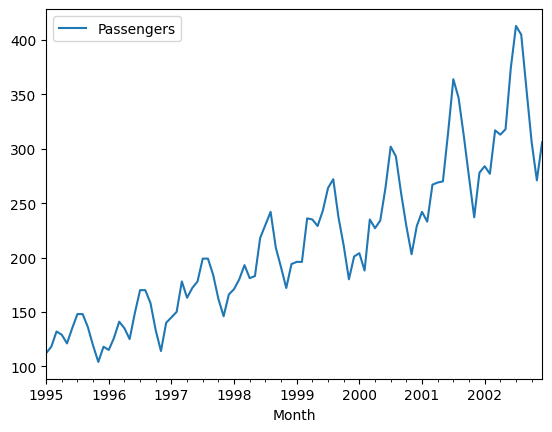

In [29]:
data.plot()

<Axes: >

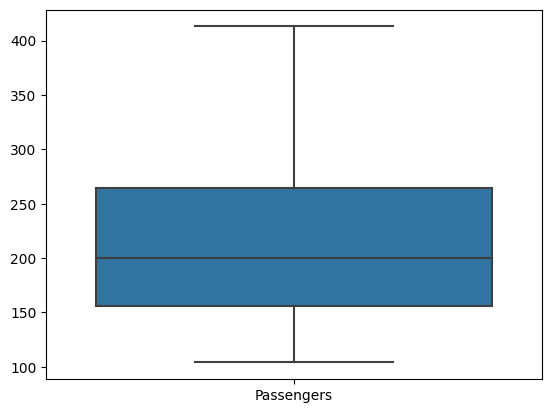

In [30]:
import seaborn as  sns
sns.boxplot(data =data)

array([[<Axes: title={'center': 'Passengers'}>]], dtype=object)

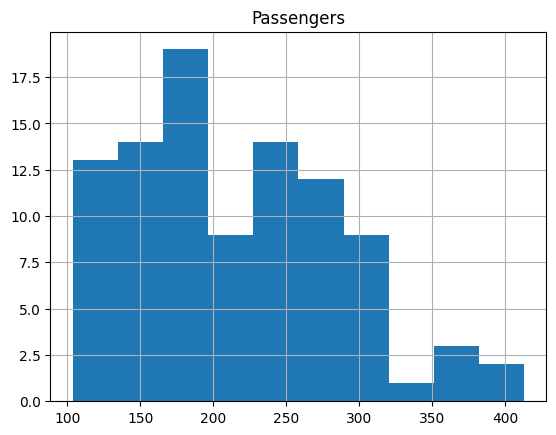

In [31]:
data.hist()

In [33]:
np.array(data["Passengers"])

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306])

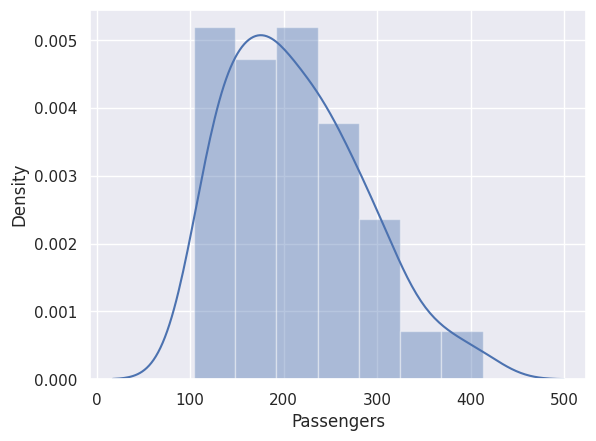

In [34]:
import seaborn as sns
sns.set_theme()
rk= sns.distplot(data['Passengers'],kde=True)

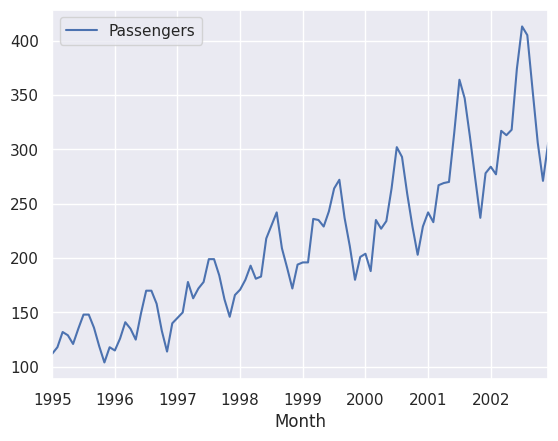

In [36]:
##line plot
from pandas import read_csv
import matplotlib.pylab as plt
%matplotlib inline
data = pd.read_excel("/content/Airlines+Data.xlsx",header=0,index_col=0,parse_dates=True)
data.plot()
plt.plot(data)

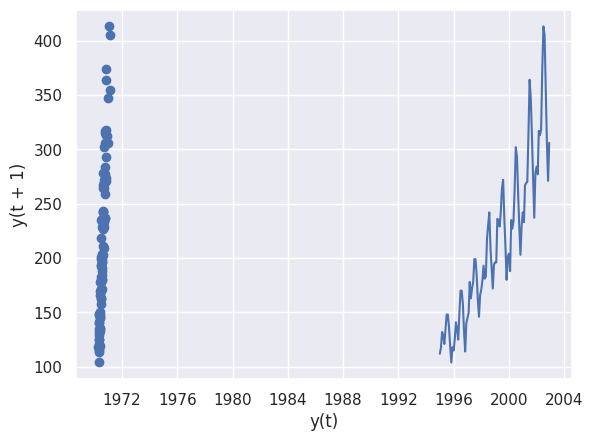

In [37]:
##lag plot
from pandas import read_csv
import matplotlib.pylab as plt
%matplotlib inline
from pandas.plotting import lag_plot
data = pd.read_excel("//content/Airlines+Data.xlsx",header=0,index_col=0,parse_dates=True)

lag_plot(data)
plt.plot(data)

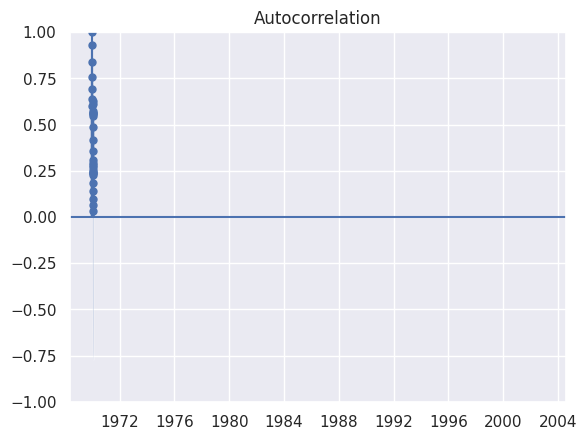

In [38]:
##autocorrelation plot
from pandas import read_csv
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
data = pd.read_excel("/content/Airlines+Data.xlsx",header=0,index_col=0,parse_dates=True)

plot_acf(data,lags=30)
plt.plot(data)

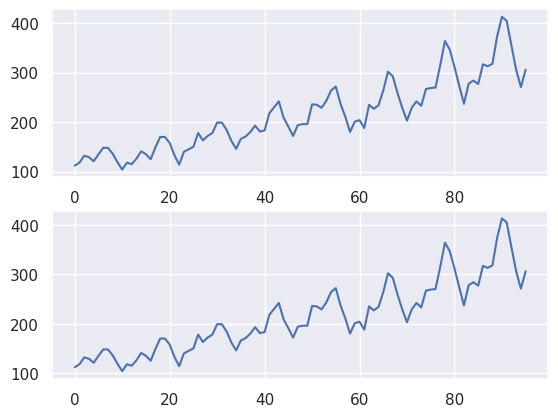

In [39]:
##square root transformation
from pandas import read_csv
from pandas import DataFrame
import matplotlib.pylab as plt
%matplotlib inline
dataframe=DataFrame(data.values)
dataframe.columns=['Passengers']
##line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])
#histogram
plt.subplot(212)
plt.plot(dataframe['Passengers'])
plt.show()

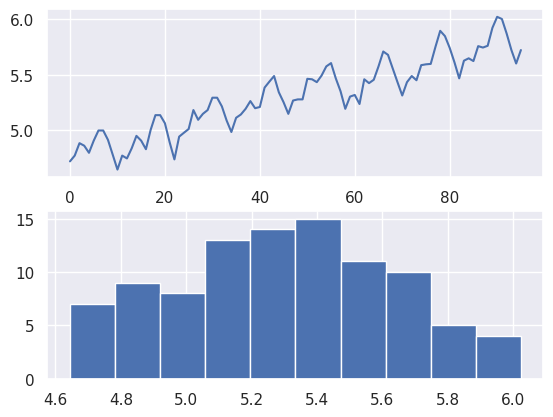

In [40]:
##log transformation
from numpy import log
dataframe=DataFrame(data.values)
dataframe.columns=['Passengers']
dataframe['Passengers']=log(dataframe['Passengers'])
##line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])
#histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

In [42]:
##forecasting base model
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
data = pd.read_excel("/content/Airlines+Data.xlsx")
data.Passengers.plot

In [43]:
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [44]:
data['Passengers'].value_counts()

229    3
118    2
306    2
235    2
135    2
      ..
218    1
230    1
209    1
191    1
271    1
Name: Passengers, Length: 80, dtype: int64

In [45]:
df_dummies=pd.DataFrame(pd.get_dummies(data['Passengers']),columns=['Q1','Q2','Q3','Q4'])
cc=pd.concat([data,df_dummies],axis= 1)

In [46]:
cc

,Month,Passengers,Q1,Q2,Q3,Q4
0,1995-01-01,112,NaN,NaN,NaN,NaN
1,1995-02-01,118,NaN,NaN,NaN,NaN
2,1995-03-01,132,NaN,NaN,NaN,NaN
3,1995-04-01,129,NaN,NaN,NaN,NaN
4,1995-05-01,121,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
91,2002-08-01,405,NaN,NaN,NaN,NaN
92,2002-09-01,355,NaN,NaN,NaN,NaN
93,2002-10-01,306,NaN,NaN,NaN,NaN
94,2002-11-01,271,NaN,NaN,NaN,NaN


In [49]:
cc['t'] = np.arange(1,97)
cc['t_squared'] = cc['t']**2
cc["Sales_log"] =np.log(data['Passengers'])
cc.head()

,Month,Passengers,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,1995-01-01,112,NaN,NaN,NaN,NaN,1,1,4.718499
1,1995-02-01,118,NaN,NaN,NaN,NaN,2,4,4.770685
2,1995-03-01,132,NaN,NaN,NaN,NaN,3,9,4.882802
3,1995-04-01,129,NaN,NaN,NaN,NaN,4,16,4.859812
4,1995-05-01,121,NaN,NaN,NaN,NaN,5,25,4.795791


In [50]:
train =cc.head(32)
test =cc.tail(10)

In [51]:
from sklearn.metrics import mean_squared_error

In [53]:
# Linear Model
import statsmodels.formula.api as smf
linear_model =smf.ols("Passengers~t",data =train).fit()
linear_pred = pd.Series(linear_model.predict(test['t']))
linear_rmse =np.sqrt(mean_squared_error(np.array(test['Passengers']),np.array(linear_pred)))
linear_rmse

67.95565333806856

In [54]:
#Quadratic Model
quad_model =smf.ols("Passengers~t+t_squared",data=train).fit()
quad_pred = pd.Series(quad_model.predict(test[['t','t_squared']]))
quad_rmse =np.sqrt(mean_squared_error(np.array(test['Passengers']),np.array(quad_pred)))
quad_rmse

516.3097281121014

In [57]:
# Exponential model
exp_model  =smf.ols("Passengers~t",data=train).fit()
exp_pred =pd.Series(exp_model.predict(test['t']))
exp_rmse =np.sqrt(mean_squared_error(np.array(test['Passengers']),np.array(exp_pred)))
exp_rmse

67.95565333806856

<Axes: >

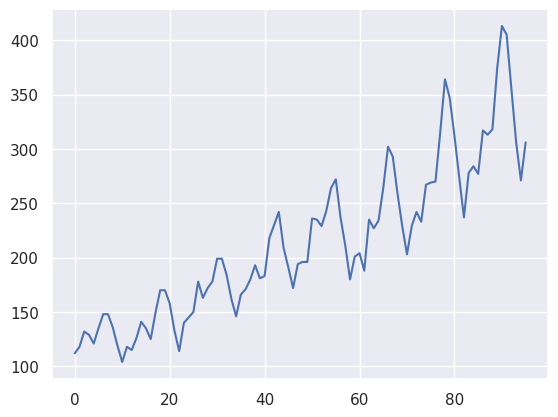

In [60]:
data.Passengers.plot(label="org")

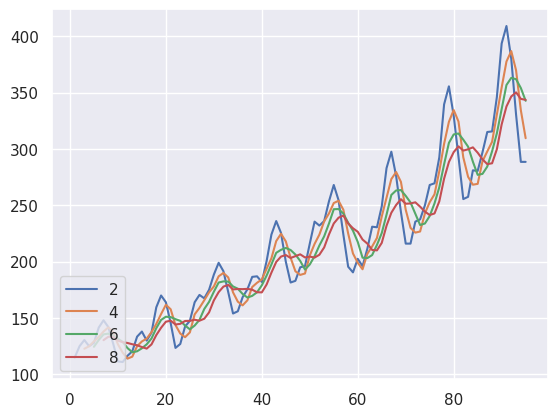

In [61]:
for i in range(2,10,2):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing #
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

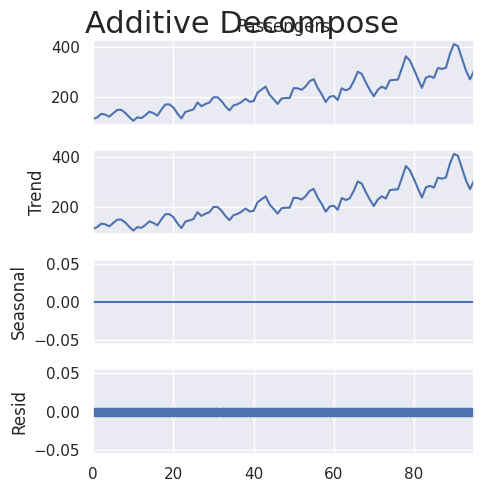

In [63]:
result_add = seasonal_decompose(x=data['Passengers'], model='additive', extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [ ]:
##Arima model

In [64]:
# To install the library
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.2 MB/s eta 0:00:00


In [71]:
import urllib.request
import requests
from bs4 import BeautifulSoup


r = requests.get('https://icons8.com/icons/set/favicon')

In [75]:
# Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(data['Passengers'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise

# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=618.049, Time=1.13 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=622.012, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=615.965, Time=0.39 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=616.628, Time=0.67 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=618.192, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=617.814, Time=0.63 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=617.881, Time=0.58 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=616.531, Time=0.36 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.10 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=618.221, Time=0.28 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=617.862, Time=0.68 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=617.462, Time=0.50 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=616.076, Time=0.14 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=619.394, Time=0.42 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -304.983
Date:                            Fri, 15 Sep 2023   AIC                            615.965
Time:                                    14:58:43   BIC                            623.222
Sample:                                         0   HQIC                           618.881
                                             - 96                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2250      0.099     -2.276      0.023      -0.419      -0.031
ar.S.L12      -0.2274      0.089     -2.548      0.011      -0.402      -0.052
sigma2        90.2700     14.667      6.155      0.000      61.524     119.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.23
Prob(Q):                              0.97   Prob(JB):                         0.33
Heteroskedasticity (H):               1.77   Skew:                             0.39
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
# Split data into train / test sets
train = data.iloc[:len(data)-12]
test = data.iloc[len(data)-12:] # set one year(12 months) for testing

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Passengers'],
                order = (0, 1, 1),
                seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   84
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -261.892
Date:                            Fri, 15 Sep 2023   AIC                            533.783
Time:                                    14:54:10   BIC                            545.097
Sample:                                         0   HQIC                           538.282
                                             - 84                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2147      0.112     -1.914      0.056      -0.435       0.005
ar.S.L12      -1.2045      0.876     -1.375      0.169      -2.921       0.512
ar.S.L24      -0.3644      0.246     -1.479      0.139      -0.847       0.118
ma.S.L12       0.9991    116.614      0.009      0.993    -227.561     229.559
sigma2        83.4241   9659.544      0.009      0.993   -1.88e+04     1.9e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.45
Prob(Q):                              1.00   Prob(JB):                         0.29
Heteroskedasticity (H):               2.52   Skew:                             0.44
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

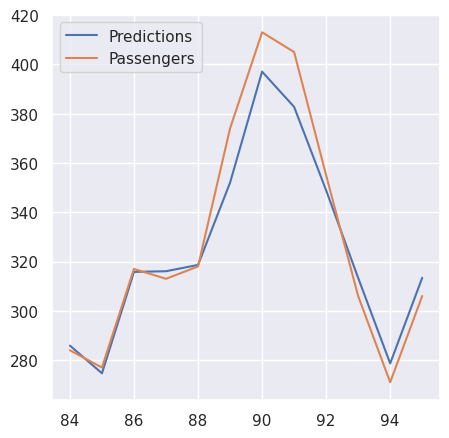

In [67]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

# plot predictions and actual values
predictions.plot(legend = True)
test['Passengers'].plot(legend = True)

In [69]:

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["Passengers"], predictions)
mean_squared_error(test["Passengers"], predictions)

121.5729601232436

<Axes: >

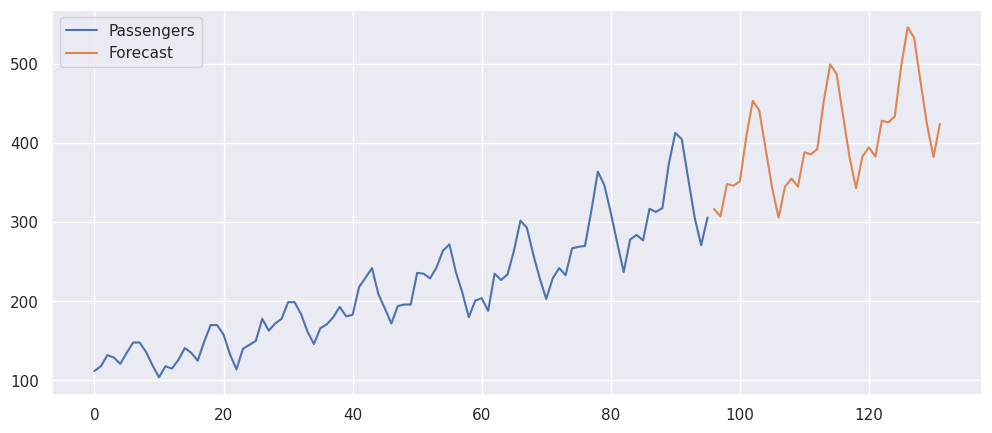

In [70]:
# Train the model on the full dataset
model = model = SARIMAX(data['Passengers'],
                        order = (0, 1, 1),
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()

# Forecast for the next 3 years
forecast = result.predict(start = len(data),
                          end = (len(data)-1) + 3 * 12,
                          typ = 'levels').rename('Forecast')

# Plot the forecast values
data['Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)